# **Guided Project: Classification and Hypothesis Testing**

---



## **Context:**

Hospital management is a vital area that gained a lot of attention during the COVID-19 pandemic. **Inefficient distribution of resources like beds, ventilators might lead to a lot of complications**. However, this can be mitigated by **predicting the length of stay (LOS) of a patient before getting admitted**. Once this is determined, the hospital can plan a suitable treatment, resources, and staff to reduce the LOS and increase the chances of recovery. The rooms and bed can also be planned in accordance with that.

**HealthPlus hospital has been incurring a lot of losses in revenue and life due to its inefficient management system.** They have been unsuccessful in allocating pieces of equipment, beds, and hospital staff fairly. **A system that could estimate the length of stay (LOS) of a patient can solve this problem to a great extent.**

## **Objective:**

As a Data Scientist, you have been hired by HealthPlus to analyze the data, find out **what factors affect the LOS the most, and come up with a machine learning model which can predict the LOS of a patient** using the data available during admission and after running a few tests. Also, **bring about useful insights and policies from the data, which can help the hospital to improve their health care infrastructure and revenue.**

## **Data Dictionary:**

The data contains various information recorded during the time of admission of the patient. It only contains **records of patients who were admitted to the hospital.** The detailed data dictionary is given below:


* **patientid**: Patient ID
* **Age**: Range of age of the patient
* **gender**: Gender of the patient
* **Type of Admission**: Trauma, emergency or urgent
* **Severity of Illness**: Extreme, moderate, or minor
* **health_condition**s: Any previous health conditions suffered by the patient
* **Visitors with Patient**: The number of patients who accompany the patient
* **Insurance**: Does the patient have health insurance or not?
* **Admission_Deposit**: The deposit paid by the patient during admission
* **Stay (in days)**: The number of days that the patient has stayed in the hospital. This is the **target variable**
* **Available Extra Rooms in Hospital**: The number of rooms available during admission
* **Department**: The department which will be treating the patient
* **Ward_Facility_Code**: The code of the ward facility in which the patient will be admitted
* **doctor_name**: The doctor who will be treating the patient
* **staff_available**: The number of staff who are not occupied at the moment in the ward

## **Approach to solve the problem:**

1. Import the necessary libraries
2. Read the dataset and get an overview
3. Exploratory data analysis - a. Univariate b. Bivariate
4. Data preprocessing if any
5. Define the performance metric and build ML models
6. Checking for assumptions
7. Compare models and determine the best one
8. Observations and business insights

## **Importing Libraries, Mount Drive and Read Data**

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Visualization
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Overwrite defauls pandas display limits - why?
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', 200)
# pd.set_option('display.max_colwidth', None)

In [2]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read dataset file
data = pd.read_csv("/content/drive/MyDrive/MIT - Data Sciences/Colab Notebooks/Week_Five_-_Classification_and_Hypothesis_Testing/Guided_Project:_Classification_and_Hypothesis_Testing/Dataset - Hospital LOS Prediction.csv")

In [4]:
# Lets make a backup copy of the data frame
data_backup = data.copy()

## **Data Overview**

In [ ]:
# Lets get an idea about the data
# Print the first two rows
data.head(2)

,Available Extra Rooms in Hospital,staff_available,Visitors with Patient,Admission_Deposit,Stay (in days),Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Facility_Code_B,...,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_None,health_conditions_Other,Insurance_Yes
0,4,0,4,2966.408696,8,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,4,2,2,3554.835677,9,0,1,0,0,1,...,1,0,1,0,0,1,0,0,0,0


In [ ]:
# Print the last two rows
data.tail(2)

,Available Extra Rooms in Hospital,staff_available,Visitors with Patient,Admission_Deposit,Stay (in days),Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Facility_Code_B,...,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_None,health_conditions_Other,Insurance_Yes
499998,2,1,2,4694.127772,23,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
499999,3,3,4,4713.868519,10,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,1


In [ ]:
# What is the shape of our data
data.shape

(500000, 43)

**The dataset contains 500000 rows and 15 features**

In [ ]:
# What tpes of features do we have
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 43 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Available Extra Rooms in Hospital      500000 non-null  int64  
 1   staff_available                        500000 non-null  int64  
 2   Visitors with Patient                  500000 non-null  int64  
 3   Admission_Deposit                      500000 non-null  float64
 4   Stay (in days)                         500000 non-null  int64  
 5   Department_anesthesia                  500000 non-null  int64  
 6   Department_gynecology                  500000 non-null  int64  
 7   Department_radiotherapy                500000 non-null  int64  
 8   Department_surgery                     500000 non-null  int64  
 9   Ward_Facility_Code_B                   500000 non-null  int64  
 10  Ward_Facility_Code_C                   500000 non-null  

**The dataset contains no null values, but does appear to have some missing values in the health_conditions feature, we will need to address this.**

The data is comprised of the following:

 - Continuous Features (**numerical data types**):

  *   Available Extra Rooms in Hospital
  *   staff_available
  *   patientid
  *   Visitors with Patient
  *   Admission_Deposit
  *   Stay (in days)

 - Categorical Features (**object data type**):

  *   Department
  *   Ward_Facility_Code
  *   doctor_name
  *   Age
  *   gender
  *   Type of Admission
  *   Severity of Illness
  *   health_conditions
  *   Insurance (binary object)

**Let's check the unique values in each column**

In [ ]:
# Checking unique values in each column
data.nunique()

,0
Available Extra Rooms in Hospital,18
staff_available,11
Visitors with Patient,28
Admission_Deposit,499508
Stay (in days),49
Department_anesthesia,2
Department_gynecology,2
Department_radiotherapy,2
Department_surgery,2
Ward_Facility_Code_B,2


*   There appears to be **24 rooms** in our facility.
*   There is a **10 staff members and 9 doctors**.

*   Patients have and **average of 3.5 visitors with the range being between 0 and 32 visitors**.
*   Patients pay an **average \$4722.32 deposit** (assumed to be in dollars)  on admission with the **range being between \$1654 and \$10104.72**.
*   The **average length of stay (in days) is 12.38**, with the **range being between 3.0 and 51 days**.

**General Observations**:
*   All numerical feature data is **slightly skewed** (as the median is not the same as the mean).

## **Data Duplication Checks**

In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
499995,False
499996,False
499997,False
499998,False


In [ ]:
data.duplicated().sum()

0

**There are no duplications to address**

## **Exploratory Data Analysis**

In [5]:
# How many unique patients has the facility served
data['patientid'].nunique()

126399

**The facility has served 126399 unique patients.**

### **Statistical Analysis**

In [ ]:
# Descriptive statistics for numerical features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Available Extra Rooms in Hospital,500000.0,3.638800,2.698124,0.000000,2.000000,3.000000,4.000000,24.00000
staff_available,500000.0,5.020470,3.158103,0.000000,2.000000,5.000000,8.000000,10.00000
Visitors with Patient,500000.0,3.549414,2.241054,0.000000,2.000000,3.000000,4.000000,32.00000
Admission_Deposit,500000.0,4722.315734,1047.324220,1654.005148,4071.714532,4627.003792,5091.612717,10104.72639
Stay (in days),500000.0,12.381062,7.913174,3.000000,8.000000,9.000000,11.000000,51.00000
Department_anesthesia,500000.0,0.088358,0.283815,0.000000,0.000000,0.000000,0.000000,1.00000
Department_gynecology,500000.0,0.686956,0.463733,0.000000,0.000000,1.000000,1.000000,1.00000
Department_radiotherapy,500000.0,0.168630,0.374425,0.000000,0.000000,0.000000,0.000000,1.00000
Department_surgery,500000.0,0.010276,0.100849,0.000000,0.000000,0.000000,0.000000,1.00000
Ward_Facility_Code_B,500000.0,0.207770,0.405712,0.000000,0.000000,0.000000,0.000000,1.00000


**Let's explore these variables in some more depth by observing their distributions**

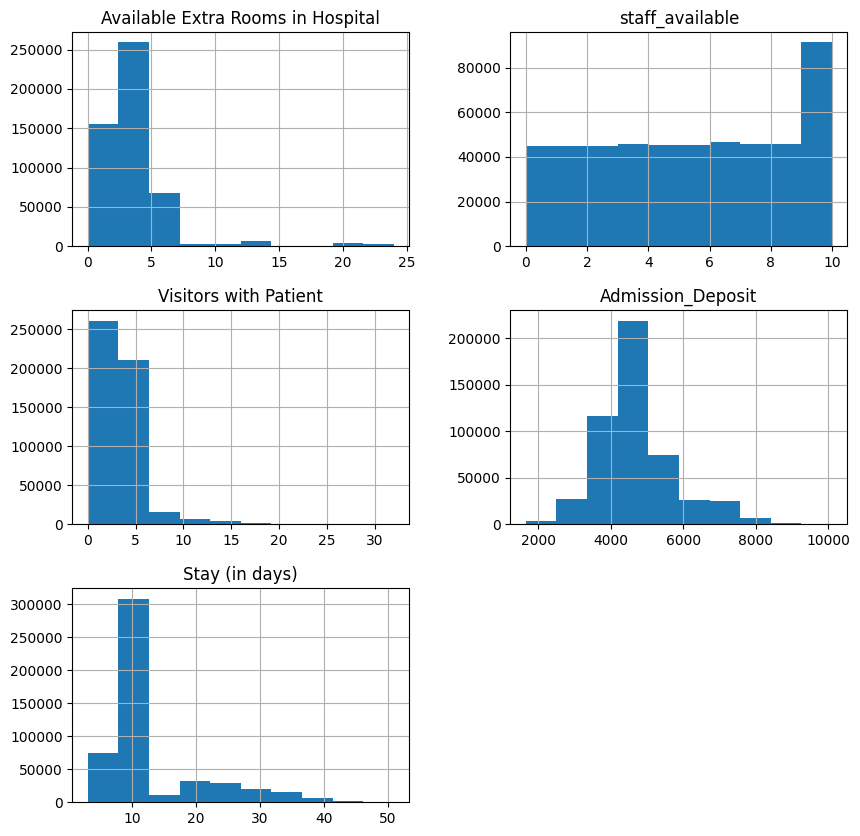

In [ ]:
# Define numerical features
num_cols = ['Available Extra Rooms in Hospital', 'staff_available', 'Visitors with Patient', 'Admission_Deposit', 'Stay (in days)']

# Creating histograms
data[num_cols].hist(figsize=(10,10))
plt.show()

**Observations:**

Thank you for the clarification. Since all the data comes from one facility, the observations can be revised as follows:

1. **Available Extra Rooms in Hospital**:
   - **Most of the time**, the facility has **fewer than 5 extra rooms available**, indicating high occupancy or a limited number of rooms. It's rare for this facility to have more than 10 extra rooms at any given time.

2. **Staff Available**:
   - The facility typically has around 8-10 staff members available at any time. This suggests that **staffing is relatively consistent**, with the facility rarely having fewer than 5 staff members.

3. **Visitors with Patient**:
   - **Most patients have fewer than 5 visitors**, with the number of visitors sharply decreasing as the count goes higher. This indicates that it's uncommon for patients to receive many visitors, possibly due to facility policies or visitor preferences.

4. **Admission Deposit**:
   - The **majority of patients are required to deposit** between 4000 and 6000 units of currency for admission. Higher deposits are rare, but there are occasional outliers with deposits up to 10,000, possibly reflecting different treatment levels or payment plans.

5. **Stay (in days)**:
   - The **typical patient stay is under 10 days**, with a sharp drop-off after that. However, there are cases of patients staying for **up to 50 days**, though these longer stays are **uncommon**. This could suggest that most treatments or hospitalizations are resolved relatively quickly, with only a few cases requiring prolonged care.

In summary, this facility operates with **high patient turnover** and typically has a **stable number of staff and visitors**. Most patients deposit moderate amounts of money and stay for less than 10 days. **Longer stays and higher deposits are outliers**.

### **Feature: Available Rooms**

In [6]:
# Define a function to find unique values, counts and percentages associated with a feature
total_patients = data['Department'].count()

def calculate_percentage(df, column_name):
  """Calculates the percentage of each unique value in a given column.

  Args:
    df: The pandas DataFrame containing the data.
    column_name: The name of the column to analyze.

  Returns:
    A pandas DataFrame with the percentage of each unique value.
  """
  return (df[column_name].value_counts(1, dropna=False)
            .reset_index(name='Percentage')
            .rename(columns={'index': column_name})
            .assign(Count=lambda x: (x['Percentage'] * total_patients).astype(int))
            .assign(Percentage=lambda x: x['Percentage'].apply(lambda p: f'{p * 100:.2f}%'))
            .sort_values(by='Count', ascending=False)
            .loc[:, [column_name, 'Count', 'Percentage']]
          )

In [7]:
# Calculate the percentage of time when "Available Extra Rooms in Hospital" is 0 (min) and 24 (max)
calculate_percentage(data, 'Available Extra Rooms in Hospital')

,Available Extra Rooms in Hospital,Count,Percentage
0,3,145044,29.01%
1,2,141205,28.24%
2,4,114011,22.80%
3,5,47644,9.53%
4,6,15561,3.11%
5,1,12194,2.44%
6,7,4975,1.00%
7,12,2844,0.57%
8,24,2786,0.56%
9,21,2377,0.48%


*   The Facility has **zero available rooms** (maximum capacity) **only 0.31%** of the time during new intakes and has **24 available rooms** (minimum capacity) **0.56%** of the time during new intakes.
*   The majority of the time (**just over 80%**) the facility has **between 2 and 4** available rooms.

### **Feature: Departments**

In [8]:
# Find unique values, counts and percentages associated with this feature
calculate_percentage(data, 'Department')

,Department,Count,Percentage
0,gynecology,343478,68.70%
1,radiotherapy,84315,16.86%
2,anesthesia,44179,8.84%
3,TB & Chest disease,22890,4.58%
4,surgery,5138,1.03%


The **Gynecology** department sees the most patients at **over 68%**, the **Surgey** department sees the fewest at **just over 1%.**

### **Feature: Wards**

In [ ]:
# Find unique values, counts and percentages associated with this feature
calculate_percentage(data, 'Ward_Facility_Code')

**Ward F** sees the most patients at **just over 24%**, **ward C** sees the **fewest at just under 3%.**

### **Feature: Doctors**

In [ ]:
# Find unique values, counts and percentages associated with this feature
calculate_percentage(data, 'doctor_name')

*   **Dr. Sarah** is the busiest praticioner seeing **almost 20%** of all patients.
*   **Dr. Simon** is the **least busiest**, seeing just **.36%.**
*   **Dr. Mark and Dr. John** are the only two praticioners to **work in more than one department.**




The **maximum** number of visits for a patient is **21**, the **least** is **1**.

### **Feature: Available Staff**
We know form the statistical analysis above the value here ranges from 0 to 10.

In [ ]:
# Find unique values, counts and percentages associated with this feature
calculate_percentage(data, 'staff_available')

The facility is **over-staffed** just **over 9%** of the time, and is **under-staffed approximately 9%** of the time.

### **Feature: Age Ranges**



In [ ]:
# Find unique values, counts and percentages associated with this feature
calculate_percentage(data, 'Age')

*   **Over 74%** of admissions are for patients are between the ages of **21 and 50.**
*   Very young patents (ages **0 to 10**) account for only **0.67%** of admissions.
*   Elderly patients (ages **91 to 100**) account for only **0.27%** of admissions.

### **Feature: Gender**

In [ ]:
# Find unique values, counts and percentages associated with this feature
calculate_percentage(data, 'gender')

As expected, by looking at the facility department, **Females** make up the majority of admissions, at just **over 74%.**

### **Feature: Admission Type**

In [ ]:
# Find unique values, counts and percentages associated with this feature
calculate_percentage(data, 'Type of Admission')

**Trauma** accounts for just **over 62%** of admissions.

### **Feature: Severity of Illness**

In [ ]:
# Find unique values, counts and percentages associated with this feature
calculate_percentage(data, 'Severity of Illness')

**Moderate illness** is the **most common serverity of illness** at just **over 56%** of admissions.

### **Feature: Health Conditions**

In [ ]:
# Find unique values, counts and percentages associated with this feature
calculate_percentage(data, 'health_conditions')

*   There are **5 health conditions** in the dataset.
*   Some data-cleanup is necessary to handle the **"NaN" values** - those would be **equivalent to "none"**, accounting for **just over 30%** of admissions.
*   **"Other" conditions** accounts for the most number of admissions at **nearly 19%.**

### **Feature: Visitors**

In [ ]:
# Find unique values, counts and percentages associated with this feature
calculate_percentage(data, 'Visitors with Patient')

**The majority of patients have between 2 and 4 visitors, just over 86%.**

### **Feature: Insurance**

In [ ]:
# Find unique values, counts and percentages associated with this feature
calculate_percentage(data, 'Insurance')

**Nearly 79% of patients have health insurance.**

### **Feature: Admission Deposit**

In [ ]:
# Find unique values, counts and percentages associated with this feature
data['Admission_Deposit'].describe()

The **mean deposi**t is **approximatley $4722**

### **Feature: Stay (in days)**

In [ ]:
# Find unique values, counts and percentages associated with this feature
calculate_percentage(data, 'Stay (in days)')

In [ ]:
# Bin the 'Stay (in days)' column, fixing the bin labels
data['Stay_bins'] = pd.cut(data['Stay (in days)'],
                           bins=[0, 2, 5, 7, 10, 13, 16, 19, 50, np.inf],
                           labels=['0-2', '3-5', '6-7', '8-10', '11-13', '14-16', '17-19', '20-50', '51+'],
                           include_lowest=True)

# Calculate the percentage of patients in each bin
bin_percentages = data['Stay_bins'].value_counts(normalize=True) * 100

# Get the counts of patients in each bin
bin_counts = data['Stay_bins'].value_counts()

# Concatenate the counts and percentages
bin_counts = pd.concat([bin_counts, bin_percentages], axis=1)
bin_counts.columns = ['Count', 'Percentage']

# Add percentage symbol to Percentage column
bin_counts['Percentage'] = bin_counts['Percentage'].apply(lambda x: f'{x:.2f}%')

# Order the data by labels
desired_order = ['0-2', '3-5', '6-7', '8-10', '11-13', '14-16', '17-19', '20-50', '51+']
bin_counts = bin_counts.reindex(desired_order)

# Print the results
print(bin_counts)


The **Length of Stay** for the majority of patients is **between 8 and 10 days**, at just over **58%** of patients, with **just over 73%** staying **10 days or less.**

**Observations**

 - Data Cleanup:

  *   There are a lot of inconsistencies in how columns have been named hinting at sloppy design, ~~it might make sense for us to clean that up~~.
  *   There are (151,888) values expressed as 'nan' in the health_conditions filed that will need to be investigated and addressed.
  * The statistical description suggests there might be patient(s) id(s) with a negative value, but we will not need to worry about that as thatis only an identifier and will not be helpful in further analysis, and as such, will be dropped.

- Facility:

  * At times the minimum number of available beds is 0, capacity might need to be examined.
  * At times the number of available staff is 0, so staffing might need to be examined.
  * There is a wide range in patient visitor number, in-room guest accomodations, or limiting the number of visitors might need to be examined.










In [ ]:
data.columns

In [ ]:
# We MUST drop the "Stay_bins" as this is something we appended for LOS determinations - else it will mess with our decision tree
#data.drop('Stay_bins', axis=1, inplace=True)
#data.drop('Stay_bins_3-5', axis=1, inplace=True)
#data.drop('Stay_bins_6-7', axis=1, inplace=True)
#data.drop('Stay_bins_8-10', axis=1, inplace=True)
#data.drop('Stay_bins_11-13', axis=1, inplace=True)
#data.drop('Stay_bins_14-16', axis=1, inplace=True)
#data.drop('Stay_bins_17-19', axis=1, inplace=True)
#data.drop('Stay_bins_20-50', axis=1, inplace=True)
#data.drop('Stay_bins_51+', axis=1, inplace=True)

## **Data Cleanup**

**Health Conditions**:

In [ ]:
# Handle the missing values in the health_conditions column
data['health_conditions'].fillna('None', inplace=True)

# make sure all missing vlaues have been replaced
data['health_conditions'].isnull().sum()

data['health_conditions'].unique()

array(['Diabetes', 'Heart disease', 'None', 'Other', 'Asthama',
       'High Blood Pressure'], dtype=object)

In [ ]:
# Lets make sure that corrected the missing values counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  500000 non-null  int64  
 1   Department                         500000 non-null  object 
 2   Ward_Facility_Code                 500000 non-null  object 
 3   doctor_name                        500000 non-null  object 
 4   staff_available                    500000 non-null  int64  
 5   patientid                          500000 non-null  int64  
 6   Age                                500000 non-null  object 
 7   gender                             500000 non-null  object 
 8   Type of Admission                  500000 non-null  object 
 9   Severity of Illness                500000 non-null  object 
 10  health_conditions                  500000 non-null  object 
 11  Visitors with Patient              5000

**PatientID**:

In [ ]:
# The statistical description suggests there might be a patient id with a negative value, so data cleanup my be needed
# Find any patient ID that is <=0
data[data['patientid'] <= 0]

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
2238,1,gynecology,D,Dr Sarah,0,-914,11-20,Female,Trauma,Moderate,High Blood Pressure,6,Yes,6778.130714,8
2977,2,anesthesia,A,Dr Mark,6,-842,51-60,Male,Trauma,Moderate,None,2,Yes,4814.433104,41
4037,4,anesthesia,A,Dr Mark,2,-1046,21-30,Male,Trauma,Extreme,Heart disease,4,Yes,4440.225183,19
5354,3,gynecology,F,Dr Sophia,9,-928,31-40,Female,Trauma,Moderate,Heart disease,3,Yes,8376.323315,8
5682,2,gynecology,D,Dr Nathan,8,-61,41-50,Female,Emergency,Minor,None,4,Yes,4798.440801,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496609,3,gynecology,B,Dr Nathan,2,-751,31-40,Female,Emergency,Minor,Other,4,No,3674.268067,8
497094,5,gynecology,B,Dr Sarah,9,-569,41-50,Female,Trauma,Extreme,Asthama,4,Yes,3172.891233,9
497200,6,gynecology,D,Dr Sarah,3,-588,11-20,Female,Emergency,Minor,High Blood Pressure,4,No,4581.742646,7
498190,2,anesthesia,E,Dr John,10,-55,81-90,Female,Trauma,Moderate,Diabetes,2,No,4624.389375,32


Since **patientid** is a database table key it **will not be usefull** in our analysis and **should be dropped**.

In [ ]:
# Drop the patientid column
data.drop('patientid', axis=1, inplace=True)

data.head(2)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9


## **Univariate Analysis - Numerical Features**

In [ ]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

### **Feature: Available Rooms**

In [ ]:
histogram_boxplot(data, "Available Extra Rooms in Hospital", kde = True, bins = 24)

**Observations:**

### **Feature: Available Staff**

In [ ]:
histogram_boxplot(data, "staff_available", kde = True, bins = 5)

**Observations:**

*   The data looks to be faily evenly distributed about the mean with no outliers.

### **Feature: Visitors**

In [ ]:
histogram_boxplot(data, "Visitors with Patient", kde = True, bins = 20)

**Observations**

*   The **majority of patients** have **5 or fewer** visitors.

### **Feature: Admission Deposit**

In [ ]:
histogram_boxplot(data, "Admission_Deposit", kde = True, bins = 20)

**Observations:**

*   The **majority of admission deposits** are clustered around **4,000 to 5,500**, with a **few exceptionally high values** acting as outliers, **skewing** the distribution **slightly to the right**.

### **Feature: Length of Stay**

In [ ]:
histogram_boxplot(data, "Stay (in days)", kde = True, bins = 30)

**Observations:**

- **Fewer patients are staying more than 10 days in the hospital and very few stay for more than 40 days**. This might be because the majority of patients are admitted for moderate or minor illnesses.
- The peak of the distribution shows that **most of the patients stay for 8-9 days in the hospital.**

## **Univariate Analysis - Categorical Features**

In [ ]:
# Define categorical features
cat_cols = ['Department', 'Ward_Facility_Code', 'doctor_name', 'Age', 'gender', 'Type of Admission', 'Severity of Illness', 'health_conditions', 'Insurance']

# Printing the % sub categories of each category
for i in cat_cols:
    print(data[i].value_counts(normalize=True))
    print('*'*40)

Department
gynecology            0.686956
radiotherapy          0.168630
anesthesia            0.088358
TB & Chest disease    0.045780
surgery               0.010276
Name: proportion, dtype: float64
****************************************
Ward_Facility_Code
F    0.241076
D    0.238110
B    0.207770
E    0.190748
A    0.093102
C    0.029194
Name: proportion, dtype: float64
****************************************
doctor_name
Dr Sarah     0.199192
Dr Olivia    0.196704
Dr Sophia    0.149506
Dr Nathan    0.141554
Dr Sam       0.111422
Dr John      0.102526
Dr Mark      0.088820
Dr Isaac     0.006718
Dr Simon     0.003558
Name: proportion, dtype: float64
****************************************
Age
21-30     0.319586
31-40     0.266746
41-50     0.160812
11-20     0.093072
61-70     0.053112
51-60     0.043436
71-80     0.037406
81-90     0.016362
0-10      0.006736
91-100    0.002732
Name: proportion, dtype: float64
****************************************
gender
Female    0.74162
Male  

**Observations:**

Here's an analysis of the categorical data from this facility:

1. **Doctor Distribution**:
   - The **top three doctors**—Dr. Sarah, Dr. Olivia, and Dr. Sophia—account for **more than 50% of the cases**, indicating that they handle the majority of patients.
   - The remaining doctors see progressively fewer patients, with Dr. Isaac and Dr. Simon managing the least, suggesting a strong concentration of patient assignments among the top doctors.

2. **Age Distribution**:
   - **Most patients (over 58%) fall within the 21-40 age range**, indicating that this is the primary age group served by the facility.
   - **Older age groups (60 and above)** make up a much smaller proportion of the patient base, collectively accounting for **less than 15%**.
   - The very young (0-10) and elderly (91-100) are rare in this facility, suggesting it may focus on adult and middle-aged patients.

3. **Gender Distribution**:
   - The facility **predominantly treats female patients**, who account for about **74% of the total**, while **male patients make up around 21%**.
   - A small proportion **(around 5%) identify as "Other"**, highlighting inclusivity in gender categories, though they form a minor segment of the patient base.

4. **Type of Admission**:
   - A significant **majority of admissions (62%) are trauma-related**, suggesting that the facility specializes in or frequently handles trauma cases.
   - **Emergency cases** make up about **27% of admissions**, while **urgent**, non-emergency cases are the least common at **10%**.

5. **Severity of Illness**:
   - Over half the cases **(56%) are categorized as "Moderate"** in terms of severity, indicating that the facility deals with a high number of patients with moderately serious conditions.
   - **Minor cases** make up about **26%**, while **extreme cases** account for around **18%**. This suggests the facility handles a wide range of illness severities, but most cases are not extremely severe.

6. **Health Conditions**:
   - About **30% of patients report no health conditions**, which could indicate either a focus on acute or trauma care where pre-existing conditions are less common, or that some patients are generally healthy before admission.
   - The most common conditions among patients are **"Other" unspecified conditions (18.9%)**, followed by **high blood pressure (15.9%)** and **diabetes (14.7%)**.
   - **Asthma (13.1%)** and **heart disease (7%)** are less common but still notable conditions in the patient population.

7. **Insurance Status**:
   - The vast **majority of patients (78.6%) have insurance**, which suggests that the facility primarily caters to insured individuals.
   - A smaller proportion of patients (21.4%) are uninsured, potentially indicating a reliance on insurance coverage for treatment or a clientele that is mostly able to afford health insurance.

### Summary
This facility seems to handle a large number of trauma and emergency cases, mostly for moderately severe illnesses. The patient base is predominantly female and within the 21-40 age group, and most patients have insurance. While many patients have no major pre-existing conditions, high blood pressure, diabetes, and asthma are common among those who do. The workload is concentrated among a few doctors, with most patients treated by a small number of physicians.

## **Multivariate Analysis**

### **Correlation Matrix of Numerical Features**

In [ ]:
# Correlation matrix of numerical variables
# Select only numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
numerical_data.corr()

In [ ]:
# Plot the correlation matrix

corr_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='vlag')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

**Observations:**

**Available Extra Rooms in Hospital:**

*   Has a **very slight negative correlation with both Admission_Deposit** (-0.05) **and Stay in days** (-0.019), meaning that an increase in available rooms doesn't significantly influence these variables.
*   It has a **weak positive correlation with Visitors with Patient** (0.07), suggesting a **slight relationship between available rooms and the number of visitors**.

**Staff Available:**

*   Staff_Available shows almost **no correlation with the other variables**. The highest correlation is with Stay in days (0.0074), but this is negligible.
*   Overall, staff available appears to be **mostly independent** of the other variables in this matrix.

**Visitors with Patient:**

*   Shows a **small negative correlation with Admission_Deposit** (-0.069), meaning that more visitors might be associated with lower deposits, but this relationship is very weak.
*   The **other correlations**, like with Stay in days (0.027), are c**lose to zero**, indicating almost no significant relationship.

**Admission Deposit:**

*   There's a **small positive correlation** between Admission_Deposit and **Stay in days** (0.044). This suggests a slight tendency for higher admission deposits to be associated with longer stays, but it's not a strong relationship.
*   The **other correlations** are **either weak or near zero**, implying little to no direct relationship with the other factors.

**Stay in Days:**

*   Has a **weak positive correlation with Admission_Deposit** (0.044) and **Visitors with Patient** (0.027), though these **relationships are minimal**.
*   It has almost **no significant correlation with other variables**, like Available Extra Rooms in Hospital (-0.019).

**Summary:**

*   The matrix shows **generally weak correlations among the variables**, with most values close to 0.
*   There are **no strong relationships between the numerical variables**, meaning these variables are largely independent of each other in terms of linear association.
*   The **highest correlation**, 0.07, between Available Extra Rooms and Visitors with Patient, **is still very weak**, indicating that no two variables are highly linearly related in this dataset.

In [ ]:
# Function to plot stacked bar plots

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count  = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1   = pd.crosstab(data[predictor], data[target], margins = True).sort_values(
        by = sorter, ascending = False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize = "index").sort_values(
        by = sorter, ascending = False
    )
    tab.plot(kind = "bar", stacked = True, figsize = (count + 1, 5))
    plt.legend(
        loc     = "lower left",
        frameon = False,
    )
    plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))
    plt.show()

In [ ]:
# Function to calculate and plot average LOS by feature
def plot_avg_stay(data, group_by_column, target_column):
  """
  Plots the average stay for a target column grouped by a specified column.

  Args:
    data: The pandas DataFrame containing the data.
    group_by_column: The column to group by.
    target_column: The target column for calculating average stay.
  """
  avg_stay = data.groupby(group_by_column)[target_column].mean().sort_values(ascending=True)
  sns.barplot(y=group_by_column, x=target_column, data=data, order=avg_stay.index)
  plt.show()

# For cases where the plot needs to have its axis swapped
def plot_avg_stay2(data, group_by_column, target_column):
  """
  Plots the average stay for a target column grouped by a specified column.

  Args:
    data: The pandas DataFrame containing the data.
    group_by_column: The column to group by.
    target_column: The target column for calculating average stay.
  """
  avg_stay = data.groupby(group_by_column)[target_column].mean().sort_values(ascending=True)
  sns.barplot(x=group_by_column, y=target_column, data=data, order=avg_stay.index)
  plt.show()

### **Target Variable: Length of Stay**

#### **Length of Stay by Department**

In [ ]:
plot_avg_stay(data, 'Department', 'Stay (in days)')

In [ ]:
stacked_barplot(data, 'Department', 'Ward_Facility_Code')

In [ ]:
stacked_barplot(data, 'Department', 'doctor_name')

#### **Length of Stay by Ward**

In [ ]:
plot_avg_stay(data, 'Ward_Facility_Code', 'Stay (in days)')

In [ ]:
stacked_barplot(data, 'Ward_Facility_Code', 'Department')

In [ ]:
stacked_barplot(data, 'Ward_Facility_Code', 'Severity of Illness')

**Observations:**

*   **Wards B, D and F** all have **lower LOS** and are **used exclusively** for the **Gynecology department**.
*   **Surgical patients** are admitted to **ward A only**.
*   **Ward A** has the highest number of **extreme** cases.

#### **Length of Stay by Doctor**

In [ ]:
plot_avg_stay(data, 'doctor_name', 'Stay (in days)')

In [ ]:
stacked_barplot(data, 'doctor_name', 'Department')

In [ ]:
stacked_barplot(data, 'doctor_name', 'Ward_Facility_Code')

**Observations:**

#### **Length of Stay by Available Staff**

In [ ]:
plot_avg_stay(data, 'staff_available', 'Stay (in days)')
# sort x axis desc


**Observations:**

#### **Length of Stay by Age**

In [ ]:
# sort by stay in descending order
data.sort_values(by='Age', ascending=False, inplace=True)
sns.barplot(y='Age', x='Stay (in days)', data=data)
plt.show()

**Observations:**

#### **Length of stay by Gender**

In [ ]:
plot_avg_stay(data, 'gender', 'Stay (in days)')

**Observations:**

#### **Length of stay by Type of Admission**

In [ ]:
plot_avg_stay(data, 'Type of Admission', 'Stay (in days)')

**Observations:**

#### **Length of stay by Severity of Illness**

In [ ]:
plot_avg_stay(data, 'Severity of Illness', 'Stay (in days)')

**Observations:**

#### **Length of stay by Health Conditions**

In [ ]:
plot_avg_stay(data, 'health_conditions', 'Stay (in days)')

**Observations:**

#### **Length of stay by Visitors**

In [ ]:
plot_avg_stay(data, 'Visitors with Patient', 'Stay (in days)')

**Observations:**

#### **Length of stay by Insurance**

In [ ]:
plot_avg_stay(data, 'Insurance', 'Stay (in days)')

**Observations:**

#### **Length of stay by Admission Deposit**

In [ ]:
# This is too costly to run in terms of compute power
#plot_avg_stay(data, 'Admission_Deposit', 'Stay (in days)')

**Observations:**

## **Data Preparation**

### **Encode Categorical Data**

In [ ]:
# Perform one host encoding
data = pd.get_dummies(
                      data,
                      columns = data.select_dtypes(include = ['object', 'category']).columns,
                      drop_first = True,
                      dtype = int
                      )

### **Split Data**

In [ ]:
x = data.drop('Stay (in days)', axis=1)
y = data['Stay (in days)']

In [ ]:
# Import additional libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Perform the data split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=1)

In [ ]:
# Verify the split
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((400000, 42), (100000, 42), (400000,), (100000,))

### **Performance Metrics**

In [ ]:
# Define a function to calculate the adjusted r2
def adj_r2(predictors, target, predictions):
    r2 = r2_score(target, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]

    return 1-((1-r2)*(n-1)/(n-k-1))

In [ ]:
# Define a function to calculate mean_absolute_error
def mape_score(target, predictions):
    return np.mean(np.abs((target - predictions) / target)) * 100

In [ ]:
def model_performance_regression(model, predictors, target):
    pred   = model.predict(predictors)
    r2     = r2_score(target, pred) # Use r2_score instead of r2
    adjusted_r2 = adj_r2(predictors, target, pred) # Pass predictors to the function and rename the variable to adjusted_r2
    rmse   = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    mape = mape_score(target, pred)

    df_perf = pd.DataFrame({
                            'RMSE': rmse,
                            'MAE': mae,
                            'R2': r2,
                            'Adjusted R2': adjusted_r2, # Use adjusted_r2 instead of adj_r2
                            'MAPE': mape
                          }, index=[0])
    return df_perf

## **Decision Tree Regression**

Decision trees are a popular method in machine learning for both classification and regression tasks. They are known for their interpretability and simplicity, functioning by creating a model that predicts the value of a target variable based on several input features. Here's a detailed breakdown of how decision trees work:

In [ ]:
# Create a regressor
dt_regressor = DecisionTreeRegressor(random_state=1)
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
# Evaluate the regressor
dt_regressor_perf_test = model_performance_regression(dt_regressor, x_test, y_test)
dt_regressor_perf_test

,RMSE,MAE,R2,Adjusted R2,MAPE
0,1.81515,1.12829,0.94768,0.947658,9.341248


In [ ]:
# Lets visulaize the tree
from sklearn import tree

features = list(x.columns)
features

['Available Extra Rooms in Hospital',
 'staff_available',
 'Visitors with Patient',
 'Admission_Deposit',
 'Department_anesthesia',
 'Department_gynecology',
 'Department_radiotherapy',
 'Department_surgery',
 'Ward_Facility_Code_B',
 'Ward_Facility_Code_C',
 'Ward_Facility_Code_D',
 'Ward_Facility_Code_E',
 'Ward_Facility_Code_F',
 'doctor_name_Dr John',
 'doctor_name_Dr Mark',
 'doctor_name_Dr Nathan',
 'doctor_name_Dr Olivia',
 'doctor_name_Dr Sam',
 'doctor_name_Dr Sarah',
 'doctor_name_Dr Simon',
 'doctor_name_Dr Sophia',
 'Age_11-20',
 'Age_21-30',
 'Age_31-40',
 'Age_41-50',
 'Age_51-60',
 'Age_61-70',
 'Age_71-80',
 'Age_81-90',
 'Age_91-100',
 'gender_Male',
 'gender_Other',
 'Type of Admission_Trauma',
 'Type of Admission_Urgent',
 'Severity of Illness_Minor',
 'Severity of Illness_Moderate',
 'health_conditions_Diabetes',
 'health_conditions_Heart disease',
 'health_conditions_High Blood Pressure',
 'health_conditions_None',
 'health_conditions_Other',
 'Insurance_Yes']

In [ ]:
# Train a shallow tree to aid in visualization
dt_regressor_shallow = DecisionTreeRegressor(max_depth=3, random_state=1)
dt_regressor_shallow.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=1)

In [ ]:
# Evaluate the regressor
dt_regressor_shallow_test = model_performance_regression(dt_regressor_shallow, x_test, y_test)
dt_regressor_shallow_test

,RMSE,MAE,R2,Adjusted R2,MAPE
0,3.058892,1.879155,0.851417,0.851354,14.53351


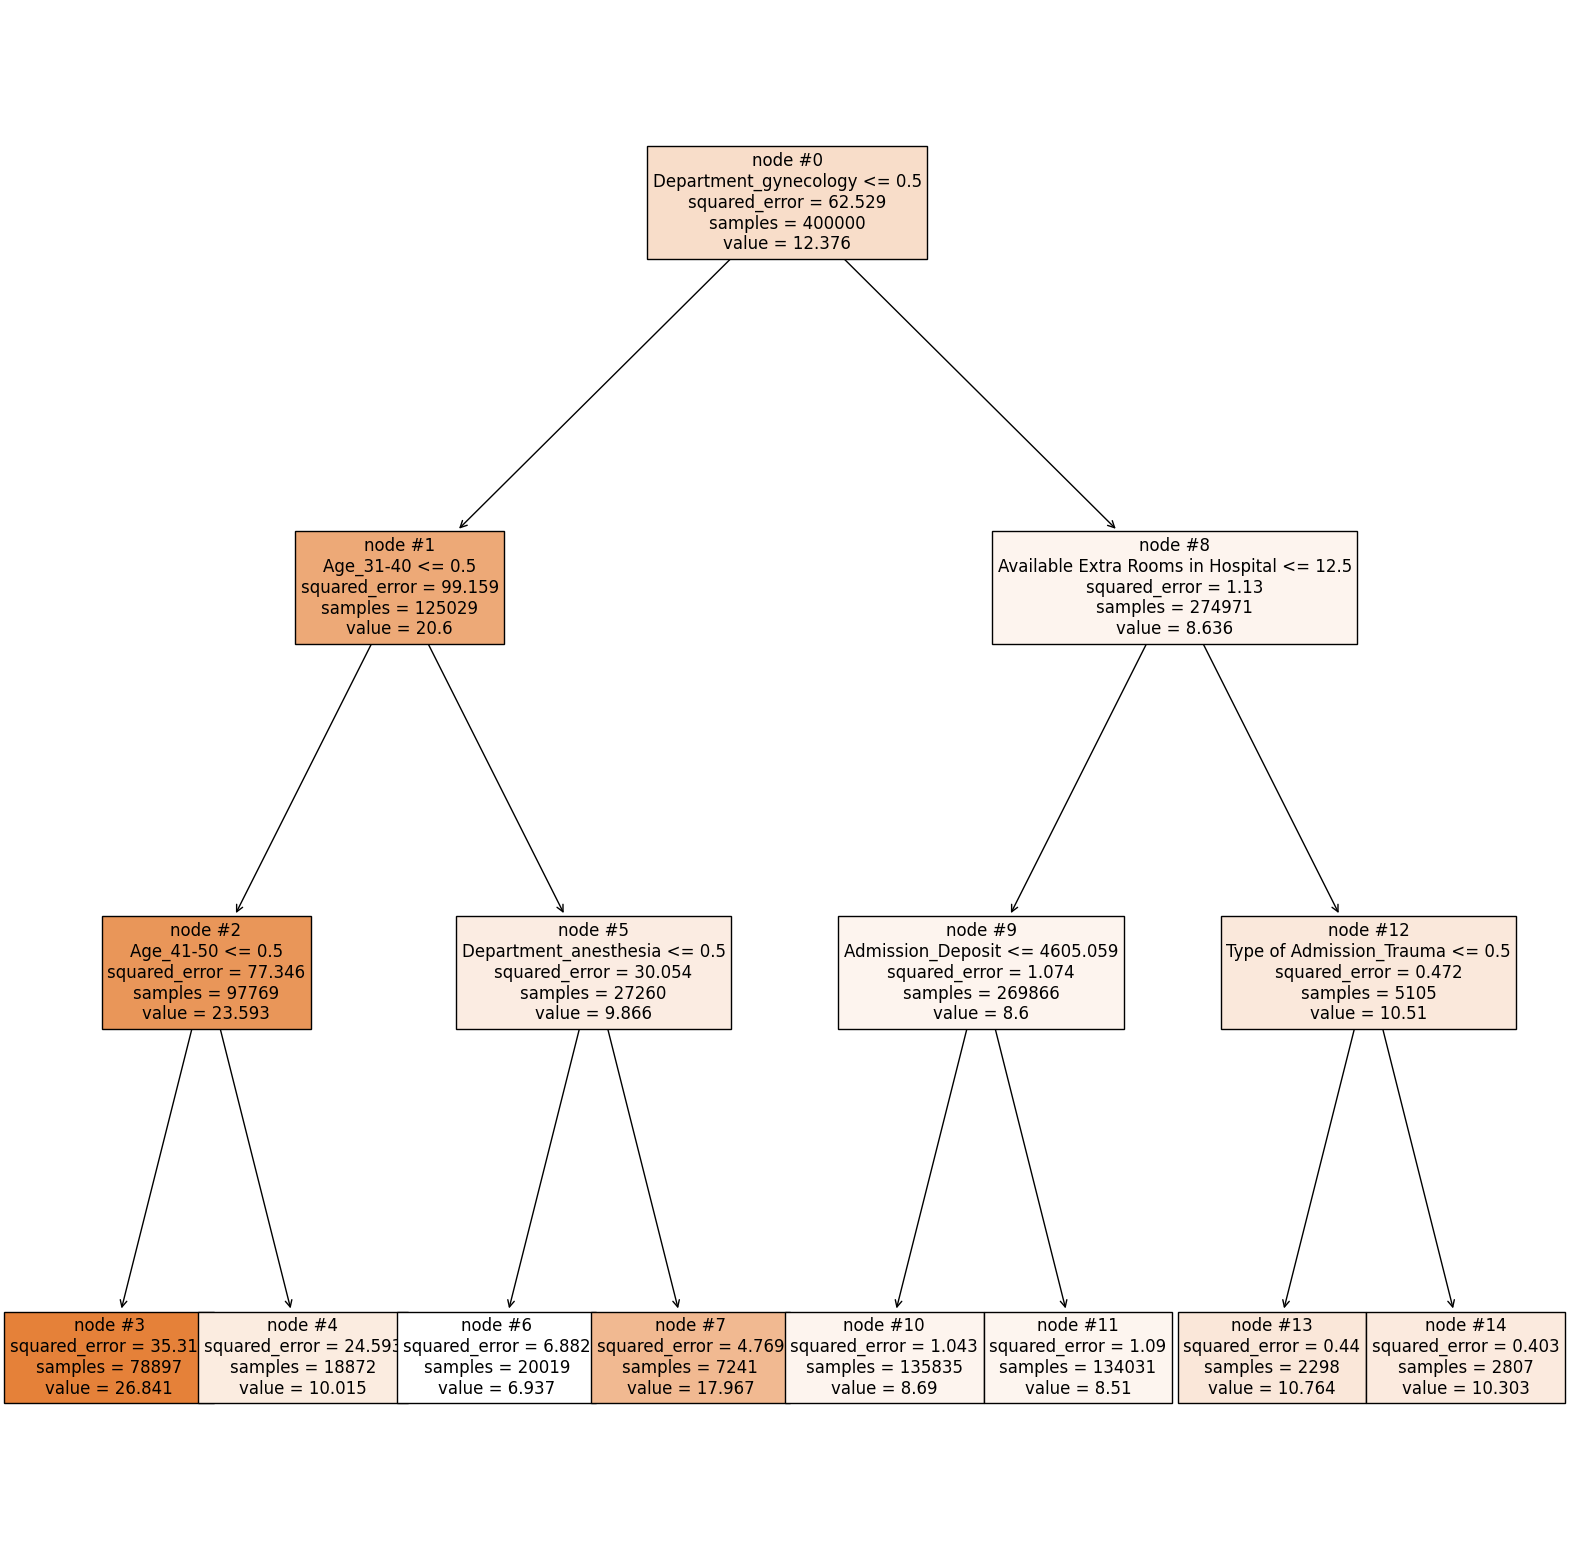

In [ ]:
# Visualize the tree
plt.figure(figsize=(20, 20))
tree.plot_tree(dt_regressor_shallow, feature_names=features, filled=True, fontsize=12, node_ids=True, class_names=True)
plt.show()

In [ ]:
# There is another way to visualize this as text
print(tree.export_text(dt_regressor_shallow, feature_names=features, show_weights=True))

|--- Department_gynecology <= 0.50
|   |--- Age_31-40 <= 0.50
|   |   |--- Age_41-50 <= 0.50
|   |   |   |--- value: [26.84]
|   |   |--- Age_41-50 >  0.50
|   |   |   |--- value: [10.02]
|   |--- Age_31-40 >  0.50
|   |   |--- Department_anesthesia <= 0.50
|   |   |   |--- value: [6.94]
|   |   |--- Department_anesthesia >  0.50
|   |   |   |--- value: [17.97]
|--- Department_gynecology >  0.50
|   |--- Available Extra Rooms in Hospital <= 12.50
|   |   |--- Admission_Deposit <= 4605.06
|   |   |   |--- value: [8.69]
|   |   |--- Admission_Deposit >  4605.06
|   |   |   |--- value: [8.51]
|   |--- Available Extra Rooms in Hospital >  12.50
|   |   |--- Type of Admission_Trauma <= 0.50
|   |   |   |--- value: [10.76]
|   |   |--- Type of Admission_Trauma >  0.50
|   |   |   |--- value: [10.30]



## **Ensemble Learning Methods**

### **Bagging (Bootstrap Aggregating)**

An ensemble learning method that aims to improve the stability and accuracy of machine learning models by combining the predictions of multiple decision trees (50 by default). It is primarily used to reduce variance and prevent overfitting, especially for high-variance models like decision trees.

In [ ]:
# bagging
bagging_estimator = BaggingRegressor(random_state=1)
bagging_estimator.fit(x_train, y_train)

BaggingRegressor(random_state=1)

In [ ]:
# Calculate the performance
bagging_estimator_perf_test = model_performance_regression(bagging_estimator, x_test, y_test)
bagging_estimator_perf_test

,RMSE,MAE,R2,Adjusted R2,MAPE
0,1.36894,0.905205,0.970242,0.970229,7.648842


**Observations:**
*   We see a significant improvement using bagging over a single decision tree, as we would expect.

### **Random Forest**

An ensemble learning method that builds multiple decision trees (100 by default) independently on random subsets of data and features, and then averages their predictions to create a more robust and accurate model. The random sampling and feature selection help reduce overfitting and improve generalization.



In [ ]:
rf_regressor = RandomForestRegressor(random_state=1)
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [ ]:
# Calculate the performance
rf_regressor_perf_test = model_performance_regression(rf_regressor, x_test, y_test)
rf_regressor_perf_test

,RMSE,MAE,R2,Adjusted R2,MAPE
0,1.303684,0.86505,0.973011,0.973,7.314995


### **Adapted Boosting (AdaBoost)**

An ensemble learning method that combines the output of multiple weak learners (usually decision trees with a single split, known as decision stumps) to create a strong predictive model. The key idea behind AdaBoost is to focus more on difficult-to-classify instances by adjusting the weights of the data points iteratively during the training process.

Adapted boosting, or AdaBoost, iteratively adjusts the weight of misclassified instances and combines multiple weak models to form a stronger predictive model.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
ada_regressor = AdaBoostRegressor(random_state=1)
ada_regressor.fit(x_train, y_train)

AdaBoostRegressor(random_state=1)

In [ ]:
# Measure performance
ada_regressor_perf_test = model_performance_regression(ada_regressor, x_test, y_test)
ada_regressor_perf_test

,RMSE,MAE,R2,Adjusted R2,MAPE
0,2.375388,1.58689,0.910399,0.910362,13.623722


### **Gradient Boosting**

A powerful ensemble machine learning technique that combines multiple weak models (typically decision trees) to create a strong predictive model. The key idea behind gradient boosting is to build new models that correct the errors made by the previous models, sequentially refining the overall prediction.

*   It focuses on minimizing a loss function by using the gradients of the loss, which guides how each subsequent model should be constructed.

*   It is widely used for its high accuracy and versatility but requires careful tuning to avoid overfitting and excessive computation time.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
grad_regressor = GradientBoostingRegressor(random_state=1)
grad_regressor.fit(x_train, y_train)

GradientBoostingRegressor(random_state=1)

In [ ]:
# Measure performance
grad_regressor_perf_test = model_performance_regression(grad_regressor, x_test, y_test)
grad_regressor_perf_test

,RMSE,MAE,R2,Adjusted R2,MAPE
0,1.792721,1.212749,0.948965,0.948944,10.247284


### **Extreme Gradient Boosting (XGBoost)**

A highly optimized and efficient implementation of gradient boosting, specifically designed for speed and performance. It’s widely used for machine learning tasks due to its scalability and high accuracy. XGBoost has gained immense popularity in data science competitions like Kaggle because of its performance advantages over traditional gradient boosting implementations.

*   It is well-suited for both classification and regression tasks and is known for delivering high accuracy.

*   XGBoost incorporates several advanced features like regularization and early stopping, making it more robust and efficient than traditional gradient boosting.

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# Instantiate the regressor
xgb_regressor = XGBRegressor(random_state=1)
xgb_regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Measure performance
xgb_regressor_perf_test = model_performance_regression(xgb_regressor, x_test, y_test)
xgb_regressor_perf_test

,RMSE,MAE,R2,Adjusted R2,MAPE
0,1.507244,1.029209,0.963925,0.96391,8.825108


In [ ]:
# Compare all regression models
models_test_comp = pd.concat(
    [
        dt_regressor_perf_test.T,
        bagging_estimator_perf_test.T,
        rf_regressor_perf_test.T,
        ada_regressor_perf_test.T,
        grad_regressor_perf_test.T,
        xgb_regressor_perf_test.T
    ],
    axis=1)

models_test_comp.columns = [
                            'Decision Tree',
                            'Bagging',
                            'Random Forest',
                            'AdaBoost',
                            'Gradient Boosting',
                            'XGBoost'
                            ]
models_test_comp.T

,RMSE,MAE,R2,Adjusted R2,MAPE
Decision Tree,1.815150,1.128290,0.947680,0.947658,9.341248
Bagging,1.368940,0.905205,0.970242,0.970229,7.648842
Random Forest,1.303684,0.865050,0.973011,0.973000,7.314995
AdaBoost,2.375388,1.586890,0.910399,0.910362,13.623722
Gradient Boosting,1.792721,1.212749,0.948965,0.948944,10.247284
XGBoost,1.507244,1.029209,0.963925,0.963910,8.825108


We can choose the best model and further enhance it by using hyperparameters.

### **Tuning Random Forest Regressor**

In [ ]:
# Instantiate a random forest regressor
rf_tuned = RandomForestRegressor(random_state=1)

# Specify hyerparameters (note you MUST include the default) - this is very costly in terms of computation power (3*3*2*5 so 90 forests)
rf_tuned_params = {
                  'n_estimators': [100, 110, 120],
                  'max_depth': [None, 5, 7],
                  'max_features': [0.8, 1],
                  }

In [ ]:
from seaborn.axisgrid import Grid

In [ ]:
# Instatiate (we can choose what to maximize)
rf_tuned_grid_obj = GridSearchCV(rf_tuned, rf_tuned_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=3)
rf_tuned_grid_obj.fit(x_train, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 7], 'max_features': [0.8, 1],
                         'n_estimators': [100, 110, 120]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
# Measure performance
rf_tuned_grid_obj_perf_test = model_performance_regression(rf_tuned_grid_obj, x_test, y_test)
rf_tuned_grid_obj_perf_test

,RMSE,MAE,R2,Adjusted R2,MAPE
0,1.296477,0.860635,0.973309,0.973297,7.277295


In [ ]:
# we can use .best_estimator_ to see which hyperperamaters worked the best and then fit those to the text data
rf_tuned_regressor = rf_tuned_grid_obj.best_estimator_
rf_tuned_regressor.fit(x_train, y_train)

RandomForestRegressor(max_features=0.8, n_estimators=120, random_state=1)

In [ ]:
# Measure performance
rf_tuned_regressor_perf_test = model_performance_regression(rf_tuned_regressor, x_test, y_test)
rf_tuned_regressor_perf_test

,RMSE,MAE,R2,Adjusted R2,MAPE
0,1.296477,0.860635,0.973309,0.973297,7.277295


In [ ]:
# Compare all regression models
models_test_comp = pd.concat(
    [
        dt_regressor_perf_test.T,
        bagging_estimator_perf_test.T,
        rf_regressor_perf_test.T,
        ada_regressor_perf_test.T,
        grad_regressor_perf_test.T,
        xgb_regressor_perf_test.T,
        rf_tuned_regressor_perf_test.T
    ],
    axis=1)

models_test_comp.columns = [
                            'Decision Tree',
                            'Bagging',
                            'Random Forest',
                            'AdaBoost',
                            'Gradient Boosting',
                            'XGBoost',
                            'Random Forest Tuned'
                            ]
models_test_comp.T

,RMSE,MAE,R2,Adjusted R2,MAPE
Decision Tree,1.815150,1.128290,0.947680,0.947658,9.341248
Bagging,1.368940,0.905205,0.970242,0.970229,7.648842
Random Forest,1.303684,0.865050,0.973011,0.973000,7.314995
AdaBoost,2.375388,1.586890,0.910399,0.910362,13.623722
Gradient Boosting,1.792721,1.212749,0.948965,0.948944,10.247284
XGBoost,1.507244,1.029209,0.963925,0.963910,8.825108
Random Forest Tuned,1.296477,0.860635,0.973309,0.973297,7.277295


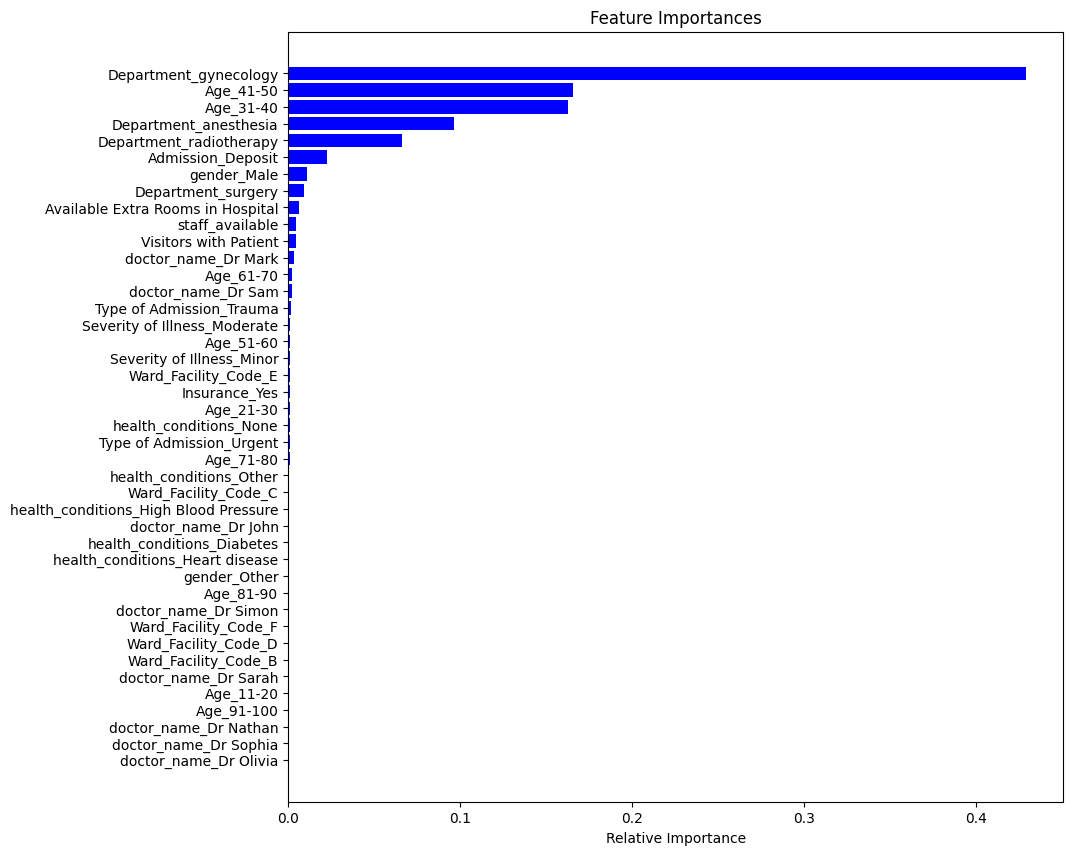

In [ ]:
# Let's visualize which features were most important
importances = rf_tuned_regressor.feature_importances_   # Returns an unsorted array of importances
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title('Feature Importances')
plt.barh(range(len(features)), importances[indices], color='b', align='center')
plt.yticks(range(len(features)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show;                                               # The ';' supresses all output but the plt

In [9]:
# Convert notebook to html
!jupyter nbconvert --to html "/content/drive/MyDrive/MIT - Data Sciences/Colab Notebooks/Week_Five_-_Classification_and_Hypothesis_Testing/Guided_Project:_Classification_and_Hypothesis_Testing/Guided Project: Classification and Hypothesis Testing.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/MIT - Data Sciences/Colab Notebooks/Week_Five_-_Classification_and_Hypothesis_Testing/Guided_Project:_Classification_and_Hypothesis_Testing/Guided Project: Classification and Hypothesis Testing.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 1223392 bytes to /content/drive/MyDrive/MIT - Data Sciences/Colab Notebooks/Week_Five_-_Classification_and_Hypothesis_Testing/Guided_Project:_Classification_and_Hypothesis_Testing/Guided Project: Classification and Hypothesis Testing.html
